## Heart Disease Classification

In [29]:
## Importing Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [30]:
## importing data 

df = pd.read_csv('processed.cleveland.data', header = None)

## first five rows

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Defining the column names to make it easier to format the data 

1. **age** : age in years
2. **sex** : sex (1 = male; 0 = female)
3. **cp** : chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. **trestbps** : resting blood pressure (in mm Hg on admission to the hospital)
5. **chol** : serum cholestoral in mg/dl
6. **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg** : resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach** : maximum heart rate achieved
9. **exang** : exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** : ST depression induced by exercise relative to rest
11. **slope** : the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. **ca** : number of major vessels (0-3) colored by flourosopy
13. **thal** : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **hd** : diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [31]:
## Change the column names to column numbers 

df.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Dealing with missing data and organising the data is proper format

In [32]:
## Now we can see that 'ca' and 'thal' have object data types 
##(object datatype is generally a combination of numbers and letters)
## In reality 'ca' and 'thal' should have few values representing categories

df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [33]:
## Checking for the unique values for of 'ca' and 'thal'

print(df['ca'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [34]:
## Print number of missing values in 'ca' and 'thal'

print(len(df[df['ca']=='?']))
print(len(df[df['thal']=='?']))

4
2


In [35]:
## checking missing values for either 'ca' or 'thal' column
## We can see that total 6 rows are there with missing value
## Since 6 rows of 303 (total rows in the df dataset) is nearly 2%, therefore we can directly remove these values from the dataset

len(df.loc[(df['ca']=='?') 
           | (df['thal']=='?')])

6

In [36]:
## Removing the missing rows
## These is also the check point

df_no_missing = df.loc[(df['ca']!='?') 
                       & (df['thal']!='?')]

df_no_missing.shape

(297, 14)

In [37]:
## Now we can see that there are no missing values in 'ca' and 'thal' columns 

print(df_no_missing['ca'].unique())
print(df_no_missing['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


## Format data Part I : Split the data into dependent and Indepedent variables 

We are formatting the data to make the classification Tree

The firat step is to split the data into two parts:

1) The columns of the data that we will use to make classifications **(X)**

2) The columns of data that we want to predict **(y)**

In [38]:
X = df_no_missing.drop(['hd'],axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [39]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format the data part 2 : One-Hot Encoding

In [40]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [41]:
## Check the unique values of all categorical data to ensure there are no misleading values
## We can see that  sex, fbs (fasting blood sugar) and exang (exercise inclueded angina) are only having 0s and 1s 
## we will first format the categorical data cp, restecg, slope, thal

print(X['cp'].unique())
print(X['restecg'].unique())
print(X['slope'].unique())
print(X['thal'].unique())
print(X['sex'].unique())
print(X['fbs'].unique())
print(X['exang'].unique())

[1. 4. 3. 2.]
[2. 0. 1.]
[3. 2. 1.]
['6.0' '3.0' '7.0']
[1. 0.]
[1. 0.]
[0. 1.]


Now some rows are supposed to be categories and others as floats in X variable

**age, restbp, chol and thalach** are supposed to be Float64 only. Therefore datatypes for these columns is correct and nothing to be changed in them. While all the other **(cp, restecg, slope, thal, sex, fbs, exang)** columns needs to be inspected to make sure that they only contain reasonable values and some of them needs to be changed.This is because, while SCIKIT learn **Decision Trees** natively supports continuous data, like resting blood pressure (restbp) and maximum heart rate (thalach), they do not natively support categorical data like chest pain (cp), which contains 4 different categories. Therefore we have to use **One - Hot Encoding** technique to convert a column of categorical data into multiple columns of **binary values i.e 0s and 1s**.

Treating the categorical data as continuous data will cause a problem as lets take an example of chest pain **(cp)**. We have 4 categories for cp as below.

1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic

If we treat values 1,2,3,4 as continuous data then the decision tree would treat 4 (which is 'asymptomatic') more similar to 3 ('non-anginal pain') and would cluster them together and 1 and 2 cp in another cluster. Converting these categorical data into proper format will remove this problem.

We can do this in one of the below two ways :-

1) columnTransformer() --> Scikit learn >> This converts data into array and losses the column names

2) get_dummies() --> from Pandas >> This retains the data in dataframe format and thus retains column names

In [42]:
## First we will process cp, restecg, slope, thal as they contain more than 2 categories

X_encoded = pd.get_dummies(X, columns = ['cp',
                                         'restecg',
                                         'slope',
                                         'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


Now we have to process the three remaining categorical data **sex**, **fbs** (fasting blood sugar) and **exang** (exercise inclueded angina). **One-Hot Encoding** converts a column with more than 2 categories into multiple columns of 0s and 1s. Therefore since **sex**, **fbs** and **exang** only have 2 categories thus they do not require any formatting.

In [43]:
## y contains 5 different levels of heart disease

y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [44]:
## In this classification we are simplifying things just to classify that whether a person have a disease or not
## thus 0s for not having a heart disease and 1s for all other levels (1,2,3,4)

y_not_zero_index = y > 0 
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

## Build A Preleminary Classification Tree

We simply first split the data into training and testing dataset and build the tree

In [45]:
## Splitting the data 

x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [46]:
## Creating the decision tree and fit it to the training data

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt =clf_dt.fit(x_train, y_train)

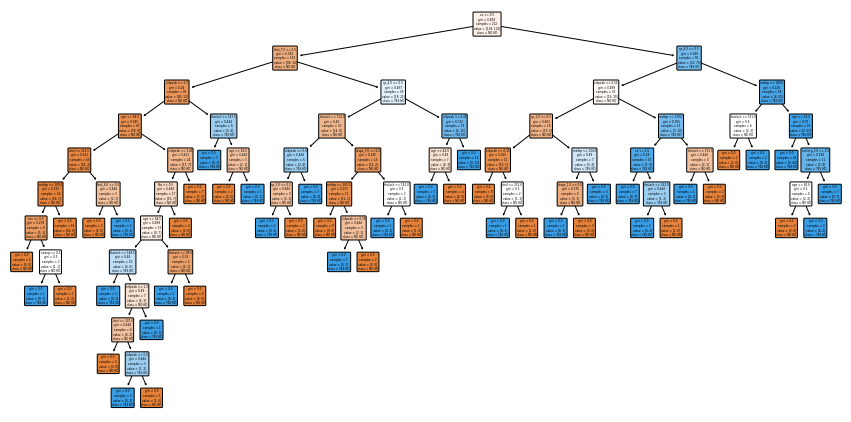

In [47]:
## Plotting the tree now 

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['NO HD','YES HD'],
         feature_names=X_encoded.columns);

Now that we have built the **Classification Tree** for classification, we will see how the **testing dataset** performs by running the testing dataset down the tree and draw **Confusion Matrix**.

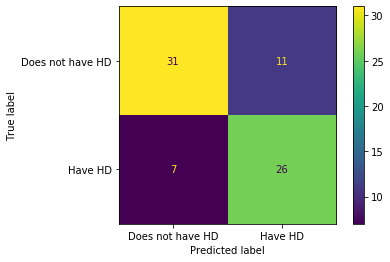

In [48]:
## plot_confusion_matrix will run the test data down the tree and draw a confusion matrix 

plot_confusion_matrix(clf_dt,
                     x_test,
                     y_test,
                     display_labels=['Does not have HD','Have HD'])

In the confusion matrix, we see that of the **31 + 11 = 42** people that does not have a heart disease, **31(74%)** are correcty classified and of the **7 + 26 = 33** people having the heart disease, **26(79%)** are correctly classified. The model may have over fitted the training dataset. We can prune the tree to give us better results.

## Cost complexity Pruning Part 1 : Visualize alpha 

Pruning will help us to find a smaller tree that helps in improving the accuracy with the testing dataset.
We need to find the right value for the pruning parameter, **alpha**, which controls little or how much pruning happens.
One way is to plot the accuracy of the tree as the function of different values. We can do this for both training and testing dataset. First lets extract all the values of alpha that are available for this tree and build a prune tree for each value of alpha. **Note :** We omit maximum value of alpha because it would prune all leaves, leaving us with only the root.

In [54]:
path = clf_dt.cost_complexity_pruning_path(x_train,y_train) # Dtermining value of aplha 
ccp_alphas = path.ccp_alphas # extract different values of alphas 
ccp_alphas = ccp_alphas[:-1] # excluding the maximum value of alpha 

In [55]:
ccp_alphas

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

In [56]:
clf_dts = []
for ccp_alpha in ccp_alphas: 
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)

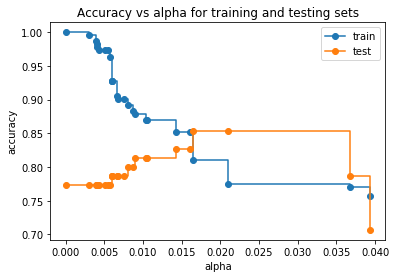

In [68]:
train_scores = [clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

Accuracy for the training dataset hits its maximum value at the alpha value of **0.016**. After this value of alpha the accuracy of training dataset decreases. Therefore **ccp_alpha = 0.016**.

**NOTE :** When we apply cost complexity pruning to a classification tree, value of alpha goes from 0 to 1 as the criterion used is **gini** and its value ranges from 0 to 1. In contrast, value for alpha for regression tree can be much larger since sum of squares residual, in theory, can go from 0 to infinity.

Now we will perform **10-fold cross validation** to find the best way to divide the orignal dataset into training and test datasets. We can do this using cross_val_score() function.

## Cross complexity pruning part 2 : Cross Validation for finding the best alpha

The graph we just drew suggests one value of alpha, **0.016** , but another set of data may suggest another optimal value.

The different training and testing datasets results in trees with different accuracies when we set alpha at **ccp_alpha = 0.016** . We can demonstrate this using **cross_val_score()** function to generate different training and testing datasets and then train and test the tree using those datasets

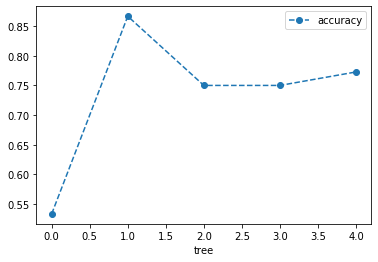

In [69]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # Create the dataset with ccp_alpha = 0.016

## Since the size of our dataset is small therefore we can use 5 cross validation

scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

We can see from above that using different training and testing datasets with the same **alpha** results in different accuracies. This shows that alpha is sensitive to datasets. Instead of using single testing and training dataset we will use **cross validation** to find the optimal value of **ccp_alpha**. 

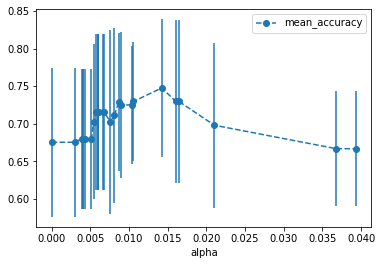

In [71]:
## Create an array to store the results of each fold during cross validation

alpha_loop_values = []

## For each value of alpha we will run 5 fold cross validation
## Then we will store the mean and standard deviation of the scores (accuracy for each call

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
## Now drawing a graph for mean and standard deviation
## for each value of alpha 

alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha','mean_accuracy','std'])


alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

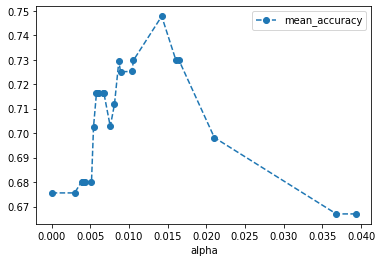

In [72]:
alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  marker='o',
                  linestyle='--')

In [95]:
## We will find the ideal value of alpha(at which the accuracy is hieghest)
## and convert it into float from panda series

ideal_ccp_alpha = alpha_results[alpha_results['mean_accuracy'] 
                                == alpha_results['mean_accuracy'].max()]['alpha']

ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

## Building and Analysing the Final classification Tree

Now we will use the ideal value of alpha, i.e **ccp_alpha = ideal_ccp_alpha** to build final classification tress

In [97]:
## Building classification tree using optimal value of alpha

clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)

clf_dt_pruned = clf_dt_pruned.fit(x_train, y_train)

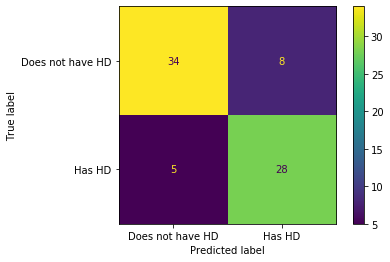

In [98]:
## Drawing the confusionm matrix using the pruned tree 

plot_confusion_matrix(clf_dt_pruned,
                     x_test,
                     y_test,
                     display_labels=['Does not have HD','Has HD'])

Of the **34+8=42** people that does not have heart disease **34(81%)** are classified correctly. Of the **5+28=33** people that have heart disease **28(85%)** are classified correctly. This is an improvement over the initial preliminary tree.

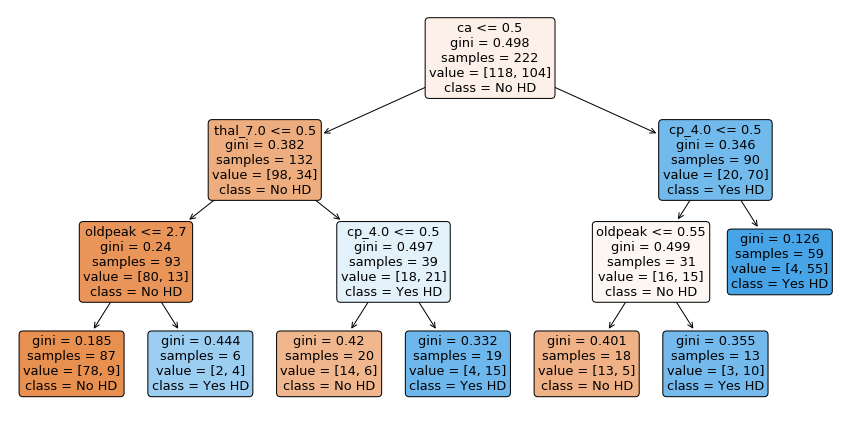

In [103]:
## Drawing the pruned tree 

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=['No HD', "Yes HD"],
         feature_names=X_encoded.columns);

1) The variable (column names) and the threshhold for splitting the observations.

2) **gini** is the gini index or the score of that node.

3) **samples** tells us how many samples are in that node.

4) **value** tells us how many samples in the node are in each category.

5) **class** tells us which category is represented most in the node.

Nodes and leaves are colored by the class. **orang-ish** in case of **NO** and  **blue-ish** in case of **YES** . The darker the shade, the lower the gini score, and that tells us how much a node or leaf is skewed towards one class.

**IN CONCLUSION**

Imported Data

Identified and dealt with missing values 

Formatted the data for decision tree using One-Hot Encoding 

Build a preliminary decision tree for classification 

Pruned the Decision tree with cost complexity pruning

Built and analysed the Final Decision tree